<a href="https://colab.research.google.com/github/DeseoDeSEo/DeepLearning/blob/master/ex00_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ➤ 단축 키 사용 법
- 실행 단축 키
  - ctrl + enter : 실행 후, 커서가 그대로 위치
  - shift + enter : 실행 후, 커서가 아래의 셀로 이동됨
  -  alt +  enter : 실행 후, 아래 셀을 생성해서 아래로 이동됨.
- 마크 다운으로 변환( 코드 ➜  텍스트 )
  - ctrl + m + m
- 코드 모드로 변환( 텍스트 ➜  코드 셀 )
 - ctrl + m + y

- 셀 아래에 추가하기
  - ctrl + m + b
- 셀 위에 추가하기
  - ctrl + m + a


### ⛤ 딥 러닝 맛보기
- 딥러닝 이란?
  - 인간의 신경망을 모방하여 학습하고 예측하는 기술
  - 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남.
  - 머신러닝에 비해 조금 더 유연한 사고를 한다.
  - 인간의 뉴런 == 딥러닝에서 '선형모델'
  - 주로, 영상, 음성, 이미지 처리에 사용된다 ~

- tensorflow
  - 구글이 만든 딥러닝을 위한 라이브러리

-keras
  - tensorflow 위에서 동작하는 라이브러리로 사용자 친화적 라이브러리.

-

In [ ]:
!top

=top - 05:14:42 up 10 min,  0 users,  load average: 1.00, 0.69, 0.40
Tasks:  25 total,   1 running,  22 sleeping,   0 stopped,   2 zombie
%Cpu(s): 10.3 us,  3.4 sy,  0.0 ni, 86.2 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  12982.7 total,   8745.6 free,   1017.7 used,   3219.3 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  11678.1 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND  
      7 root      20   0  886656  50196  30964 S   6.7   0.4   0:02.35 node     
     83 root      20   0  559500 164772  53824 S   6.7   1.2   0:05.24 jupyter+ 
      1 root      20   0    1040      8      0 S   0.0   0.0   0:00.07 docker-+ 
     19 root      20   0    5804   1020    928 S   0.0   0.0   0:00.08 tail     
     30 root      20   0    7372   3480   3180 S   0.0   0.0   0:00.30 oom_mon+ 
     32 root      20   0    7372   1912   1628 S   0.0   0.0   0:00.00 run.sh   
     33 root      20   0 1237828  14468   8276 S   0.0   0.1 

In [ ]:
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__)
# 2.13.0
# 설치버전 확인 이유: 프로젝트 진행 시 오픈 소스 가져다 쓸 때 충돌방지 !

2.13.0


In [ ]:
# 리눅스 기반의 코랩( 리눅스 명령어 그대로 사용 가능)
# 리눅스 명령어를 사용하여 현재 작업 디렉토리 확인 Print WOrk Directory
!pwd

/content


In [ ]:
# 현재 작업 디렉토리의 파일 목록 조회
!ls

 data  'ex00_딥러닝 맛보기.ipynb'


In [ ]:
# 작업 디렉토리 변경
# %cd ( change directory )
# 영구적인 작업을 할 때는 느낌표가 아닌 %를 사용함.
%cd "/content/drive/MyDrive/Colab Notebooks/DeepLearning"

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [ ]:
# 다시 현재 폴더 경로 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning


### 목표
- 공부시간에 따른 수학성적을 예측하는 회귀 모델을 만들어보자.
- keras를 활용해서 신경망을 구성하는 방법을 연습해보자.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#데이터 불러오기
data= pd.read_csv('./data/student-mat.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 문제와 답으로 분리하기
- 입력특성 : 1개 (studytime)
- 정답 : G3

In [ ]:
# 문제데이터(x)
X = data['studytime']
# 정답데이터(y)
y = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=915, test_size=0.2)

In [ ]:
# 크기확인
X_train.shape, y_train.shape

((316,), (316,))

In [ ]:
X_test.shape, y_test.shape

((79,), (79,))

In [ ]:
# 머신러닝 모델은 입력특성을 2차원으로 받는다!
# 1차원 ➜  2차원으로 변경 !
#1차원 시리즈 데이터를 2차원 데이터로 바꾸기.
X_train.values.reshape(316,1).shape

(316, 1)

### 머신러닝 모델과 딥 러닝 모델의 차이점
- 머신러닝
  - 완제품 장난감과 같다. : 팔 정도만 움직일 수 있다.(하이퍼파라미터만 조절 가능.)
  - 모델생성(완성된 객체 사용) ➜ 모델학습 ➜  모델 예측 ➜  모델 평가

- 딥러닝
  - 레고블럭과 같은 역할. : 다양한 구성이 가능함.
  - 모델생성( 모델을 직접 구성 ) ➜  모델 학습 ➜  모델 예측 ➜  모델 평가

### 머신러닝 모델링( 선형회귀 모델 )

In [ ]:
from sklearn.linear_model import LinearRegression # 선형 회귀 모델

In [ ]:
from sklearn.metrics import mean_squared_error # 회귀 모델의 평가 지표 도구

In [ ]:
from sklearn import linear_model
# 1.모델 생성
linear_model= LinearRegression()
# 2. 모델 학습(학습용 문제, 학습용 정)
linear_model.fit(X_train.values.reshape(316,1), y_train)
# 3, 모델 예측(테스트용 문제)
linear_pre = linear_model.predict(X_test.values.reshape(-1,1))
# 4. 모델 평가(실제값, 예측값)
mean_squared_error(y_test, linear_pre)

24.058078771701606

### 딥러닝 모델링(모델 구조 설계)

#### 딥러닝 모델 불러오기
#### ✔ 텐서플로우 안에 있는 keras


In [ ]:
from tensorflow.keras.models import Sequential # 모델의 뼈대
# 신경망의 구성요소( 하나씩 조립)
from tensorflow.keras.layers import InputLayer, Dense, Activation
# InputLayer: 입력
# Dense : 밀집도
# Activation :활성화함수

##### 딥러닝 모델 설계 순서
1. 신경망 구조 설계
2. 신경망 학습 및 평가 방법 설정
3. 학습
4. 예측 및 평가


In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(1,))) #입력 특성의 개수를 작성(= 문제데이터는 1개) (studytime 1개)
# 중간층(은닉층) ➜ 활성화함수 !! 역치라는 개념을 모방하기 위해서 !
model.add(Dense(units=10)) # 뉴런 10개를 연결 ➜ 학습의 능력을 결정
model.add(Activation('sigmoid')) #활성화 함수 : 인간을 모방하기 위함( 위 선형함수와 짝궁)
# 출력층
model.add(Dense(units=1)) #예측할 데이터의 형태, 우리가 현재 예측할 데이터는 성적데이터 1개 이기에 units=1이다.

In [ ]:
from sklearn import metrics
# 2. 학습 및 평가 방법 설정
# 딥러닝 모델은 학습법과 평가법을 지정해주어야한다!
model.compile(loss='mean_squared_error', # 모델의 잘못된 정도(오차) 측정 알고리즘
              optimizer='SGD', #확률적 경사하강법, #모델의 w,b 값을 최적화하는 알고리즘
              metrics = ['mse']
              )

In [ ]:
#3. 모델 학습
h1 = model.fit(X_train,y_train, validation_split=0.2, #교차검증을 위한 데이터 남겨두기.
          epochs=20) #모델의 최적화 (업데이트 횟수 = 반복횟수)
# h1변수에 담는 이유 : 로그를 출력하여 패턴을 확인하기 위함.

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test)
#오차값은 24정도이다.
# 모두의 딥러닝 넷째마당의 10장?! 134

3/3 [==============================] - 0s 4ms/step - loss: 24.1955 - mse: 24.1955


[24.19549560546875, 24.19549560546875]

In [ ]:
# 모델학습 로그 출력
h1.history

{'loss': [93.15238189697266,
  31.97440528869629,
  20.7611026763916,
  19.609071731567383,
  19.465036392211914,
  19.40113067626953,
  19.441181182861328,
  19.391525268554688,
  19.407278060913086,
  19.424924850463867,
  19.46060562133789,
  19.42523956298828,
  19.405370712280273,
  19.442781448364258,
  19.512861251831055,
  19.43385124206543,
  19.429622650146484,
  19.42514991760254,
  19.405216217041016,
  19.386127471923828],
 'mse': [93.15238189697266,
  31.97440528869629,
  20.7611026763916,
  19.609071731567383,
  19.465036392211914,
  19.40113067626953,
  19.441181182861328,
  19.391525268554688,
  19.407278060913086,
  19.424924850463867,
  19.46060562133789,
  19.42523956298828,
  19.405370712280273,
  19.442781448364258,
  19.512861251831055,
  19.43385124206543,
  19.429622650146484,
  19.42514991760254,
  19.405216217041016,
  19.386127471923828],
 'val_loss': [48.24601745605469,
  25.11296844482422,
  22.829086303710938,
  22.642696380615234,
  22.65298080444336,
  

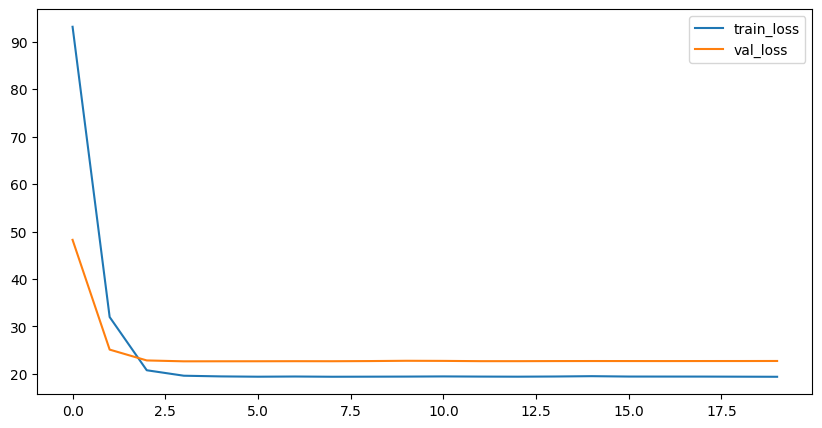

In [ ]:
#모델학습 시각화
plt.figure(figsize=(10,5))

plt.plot(h1.history['loss'],label='train_loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend() # 범례
plt.show()
# 점점 loss값이 줄어들고 있다.
# 일반화는 val_loss를 통해서 알 수 있다. 과대적합이 아닌것을 알 수 있다.
# loss값이 내려가다가 갑자기 올라가면 과대적합이다.(새로운 데이터가 들어왔을 때, 올라가면 과적합,): 과적합은 내 학습용 데이터에만 적응해서 새로운 데이터가 들어오면 큰 변화가 생김?!


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
X=data[['studytime','freetime','traveltime','health']]
y=data['G3']

In [ ]:
#train,test분리
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=918)

In [ ]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# test와 train의 크기가 같은지 봐야함.

((316, 4), (316,), (79, 4), (79,))

In [ ]:
# 1.신경망 구조설계
## 뼈대
model1 = Sequential()
## 입력층
model1.add(InputLayer(input_shape=(4,)))  # 입력특성이 4개임.
## 중간층
model1.add(Dense(units=10))
model1.add(Activation('sigmoid'))
## 출력층
model1.add(Dense(units=1))

In [ ]:
# 2. 학습방법과 평가 방법 설정
##
model1.compile(loss='mean_squared_error',
               optimizer='SGD',
               metrics=['mse'])

In [ ]:
# 3.학습
h2=model1.fit(X_train,y_train,validation_split=0.2, epochs=20)

Epoch 1/20
8/8 [==============================] - 3s 248ms/step - loss: 65.6134 - mse: 65.6134 - val_loss: 41.8606 - val_mse: 41.8606
Epoch 2/20
8/8 [==============================] - 0s 50ms/step - loss: 26.0753 - mse: 26.0753 - val_loss: 28.2805 - val_mse: 28.2805
Epoch 3/20
8/8 [==============================] - 0s 59ms/step - loss: 21.2946 - mse: 21.2946 - val_loss: 25.7836 - val_mse: 25.7836
Epoch 4/20
8/8 [==============================] - 0s 31ms/step - loss: 20.7743 - mse: 20.7743 - val_loss: 25.4253 - val_mse: 25.4253
Epoch 5/20
8/8 [==============================] - 0s 32ms/step - loss: 20.6689 - mse: 20.6689 - val_loss: 25.2599 - val_mse: 25.2599
Epoch 6/20
8/8 [==============================] - 0s 37ms/step - loss: 20.6781 - mse: 20.6781 - val_loss: 25.2164 - val_mse: 25.2164
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 20.6757 - mse: 20.6757 - val_loss: 25.2181 - val_mse: 25.2181
Epoch 8/20
8/8 [==============================] - 0s 10ms/step - loss

In [ ]:
# 4.예측 및 평가
model1.evaluate(X_test, y_test)


3/3 [==============================] - 0s 13ms/step - loss: 19.6920 - mse: 19.6920


[19.692033767700195, 19.692033767700195]

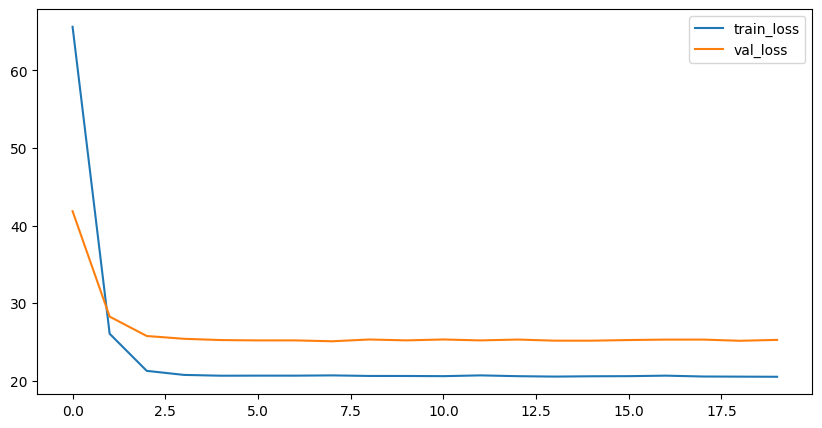

In [ ]:
#5. 시각
plt.figure(figsize=(10,5))
plt.plot(h2.history['loss'], label='train_loss')
plt.plot(h2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 퍼셉트론 제안
## 퍼셉트론 : 인공신경망 구성요소 중 하나로 딥러닝 모델의 가장 작은 기본단위
###    뇌를 구성하는 신경세포인 뉴런의 동작과 유사하게 동작.
### 신경의 흥분이 전달되기 위해서는 뉴런에 전달되는 자극의 크기가 역치 이상이 되어야함.
#### 반응의 크기 > 역치
#### 퍼셉트론 : 선형모델 + 활성화함수(할지말지)
#### y = w1x1 + w2x3 + b
#### 퍼셉트론은 입력값을 선형모델
#### 지금 사용하고 있는 활성화함수는 sigmoid이고 이전의 활성화함수는 step function (계단 함수)이다.
y={0, w1x1 + w2x3 + b <= 0
### 해당 식이 0보다 작으면 반응을 안 하고
### 해당 식이 0보다 크면 반응이 있다.
### w1, w2 : 가중치(weight), 각 입력 신호가 결과에 주는 영향력을 조절하는 매개변수
### b:편향(bias), 뉴런이 얼마나 쉽게 활성화하느냐를 조절하는 매개변수

### 다중 퍼셉트론 (MLP, Multi Layer Perceptron)
### : 퍼셉트론을 여러 개의 층으로 구성하여 만든 신경망
### xor문제 해결하기 위해서 나타남. 단층으로 해결할 수 없어서 다층이 등장하게 됨.
## sigmoid !!
### 최적화 == optimizer

### ** 회귀에서는 mse, 분류에는 크로스엔트로피 사용함.(오차를 구할 때, 실제값-예측값이 계속 같아서?!

### 최적화의 알고리즘은 경사하강법(SGD)은 기울기를 통해서 알 수 있음.
### data ➜ model ➜ 예측값 ^y - 실제값 y ➜ 오차를 통해서 최적화를 함.3
## loss손실함수 1.회귀: MSE
##              2. 분류: crossentropy